In [11]:
import random as rn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [12]:
X = np.load("dataset/data-256.npy")
labels = np.load("dataset/label-256.npy")

In [13]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(labels)
y = to_categorical(y, 10)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (2500, 256, 256, 3)
x_test shape:  (626, 256, 256, 3)
y_train shape:  (2500, 10)
y_test shape:  (626, 10)


In [16]:
# know neural ntwrk architecture # work in sequential model
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [21]:
# modelling 
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(5,5), padding = "Same", activation="relu", input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [22]:
# preprocess
from keras.preprocessing.image import ImageDataGenerator
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,   # set each sample mean to 0
    featurewise_std_normalization=False,   # divide inputs by std of the dataset
    samplewise_std_normalization= False,   # divide each input by its std
    zca_whitening=False,   # dimesion reduction
    rotation_range=10,    # randomly rotate images in the range 10 degrees
    zoom_range=0.1,      # Randomly zoom image 10%
    width_shift_range=0.2,   # randomly shift images horizontally 20%
    height_shift_range=0.2,   # randomly shift images vertically 20%
    horizontal_flip=True,     # randomly flip images
    vertical_flip=False    # randomly flip images
)
datagen.fit(x_train)

In [24]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics = ["accuracy"])

In [25]:
# Train the model
batch_size = 128
epochs = 50

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

Epoch 1/50
19/19 [==============================] - 74s 4s/step - loss: 13.0403 - accuracy: 0.1168 - val_loss: 2.2350 - val_accuracy: 0.1502
Epoch 2/50
19/19 [==============================] - 99s 5s/step - loss: 2.0824 - accuracy: 0.2066 - val_loss: 1.8950 - val_accuracy: 0.3099
Epoch 3/50
19/19 [==============================] - 170s 9s/step - loss: 1.8659 - accuracy: 0.3040 - val_loss: 1.8517 - val_accuracy: 0.3450
Epoch 4/50
19/19 [==============================] - 162s 8s/step - loss: 1.6862 - accuracy: 0.3765 - val_loss: 1.5985 - val_accuracy: 0.4137
Epoch 5/50
19/19 [==============================] - 89s 5s/step - loss: 1.6445 - accuracy: 0.3950 - val_loss: 1.7015 - val_accuracy: 0.3642
Epoch 6/50
19/19 [==============================] - 78s 4s/step - loss: 1.5851 - accuracy: 0.4186 - val_loss: 1.6920 - val_accuracy: 0.4010
Epoch 7/50
19/19 [==============================] - 78s 4s/step - loss: 1.5193 - accuracy: 0.4494 - val_loss: 1.6559 - val_accuracy: 0.4010
Epoch 8/50
19/19 

In [31]:
#test_loss, test_acc = model.evaluate(x_test, y_test)

20/20 [==============================] - 1s 63ms/step - loss: 1.2158 - accuracy: 0.7173


In [26]:
# Save the model
model.save("model/flower-recognition-model-50-epochs-1-extra-layer.h5")

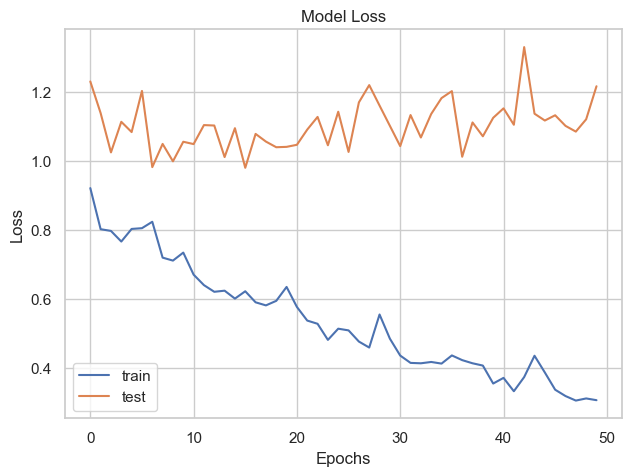

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

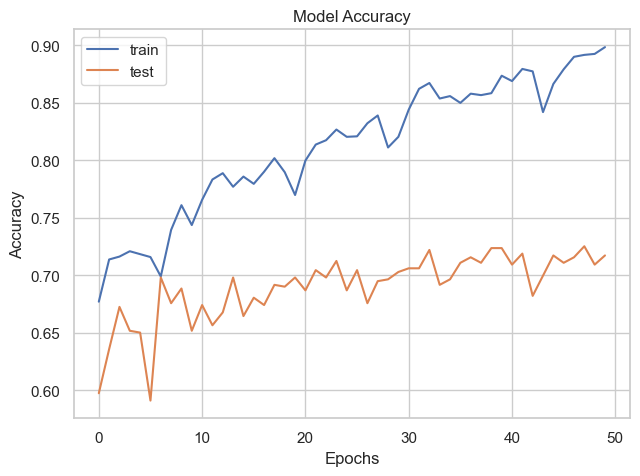

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [35]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

20/20 [==============================] - 2s 70ms/step


In [36]:

# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break
     

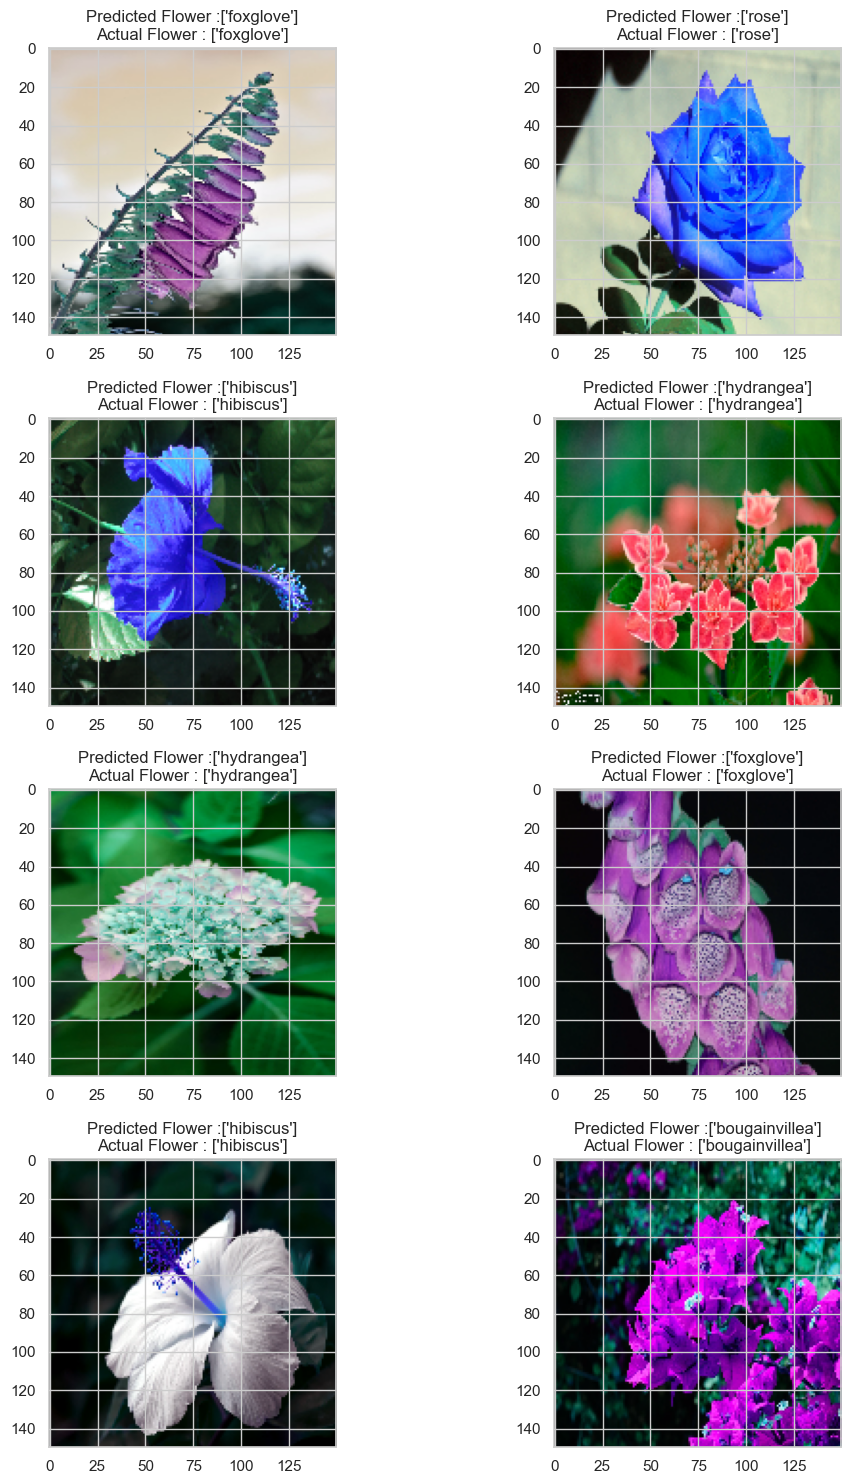

In [43]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(labelEncoder.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(labelEncoder.inverse_transform(np.argmax([y_test[prop_class[count]]]))))
        plt.tight_layout()
        count+=1

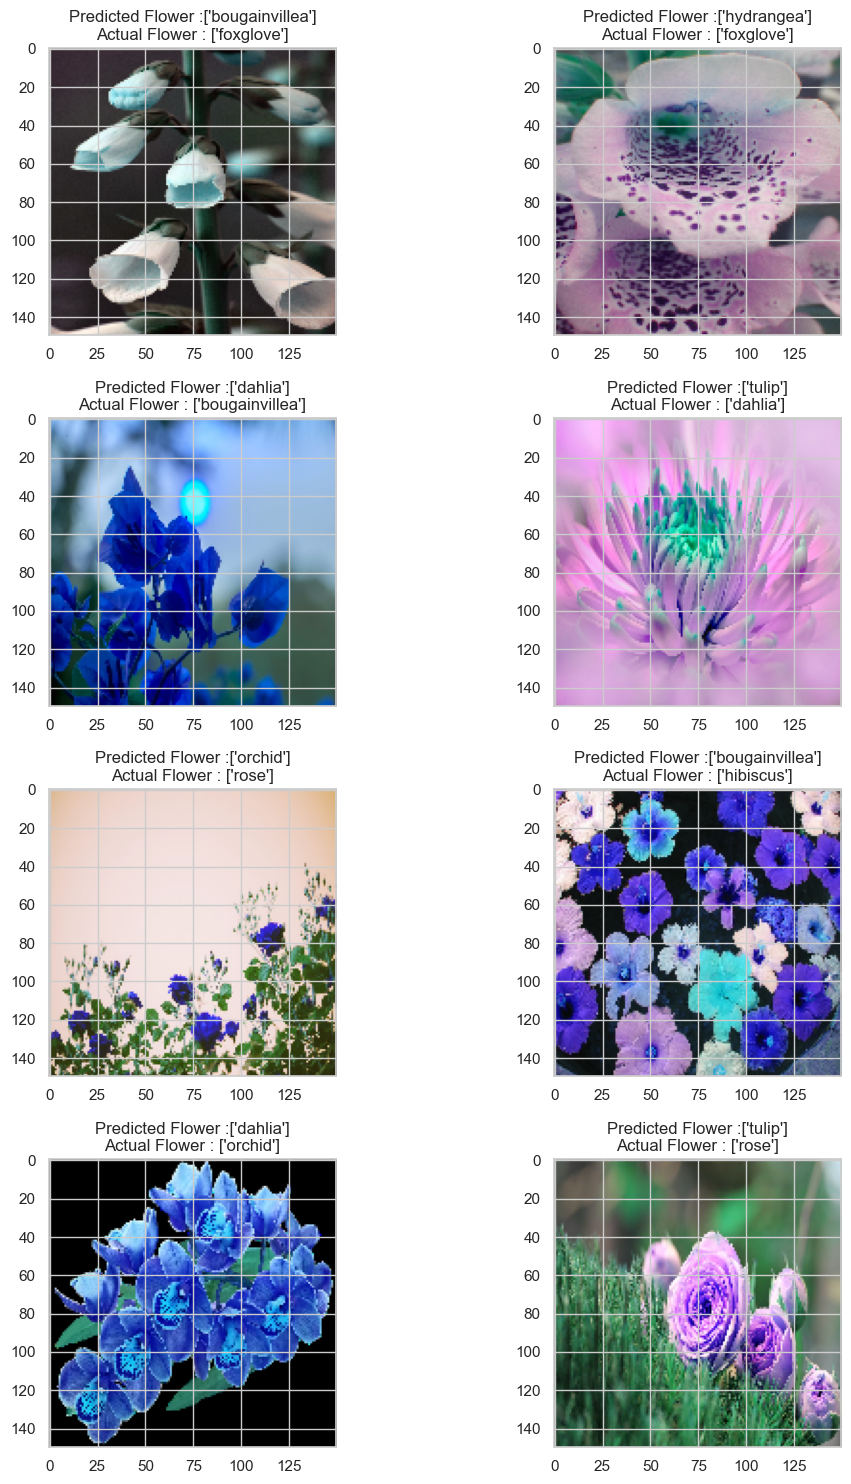

In [45]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower :"+str(labelEncoder.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(labelEncoder.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1